In [4]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

'''
삼격형 사각형 원 이미지를 구분하는 신경망
다중 클래스 분류
입력: 손으로 그린 도형 (24,24,3)
출력: 삼각형, 사각형, 원일 확률을 나타내는 벡터'''

'\n삼격형 사각형 원 이미지를 구분하는 신경망\n다중 클래스 분류\n입력: 손으로 그린 도형 (24,24,3)\n출력: 삼각형, 사각형, 원일 확률을 나타내는 벡터'

In [18]:
np.random.seed(5)
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory('dataset/handwriting_shape/train',
                                                              target_size=(24,24),
                                                              batch_size=3,
                                                              class_mode='categorical')


Found 45 images belonging to 3 classes.


In [19]:
cnn_model=tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(24,24,3),activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128,activation='relu'))
cnn_model.add(tf.keras.layers.Dense(3,activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.01),metrics=['accuracy'])

In [20]:
cnn_model.fit_generator(train_generator,steps_per_epoch=15,epochs=50)

  ...
    to  
  ['...']
Train for 15 steps
Epoch 1/50
15/15 [==============================] - 0s 27ms/step - loss: 2.7776 - accuracy: 0.4000
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.2997 - accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.3433 - accuracy: 0.8889
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.1192 - accuracy: 0.9556
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 2.6866e-04 - accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 1.2458e-04 - accuracy: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 9ms/step - loss: 6.7501e-05 - accuracy: 1.0000
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 5.2777e-05 - accuracy: 1.0000
Epoch 10/50
15/15 [==============================] - 0s 

In [58]:
cnn_model.save('model/handwriting_shape.h5')

NameError: name 'cnn_model' is not defined

[[0.361571   0.09387943 0.5445496 ]]
triangle


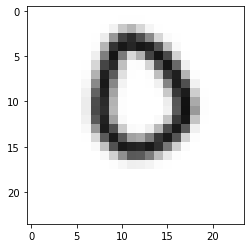

In [61]:
cnn_model=keras.models.load_model('model/handwriting_shape.h5')
img=cv2.imread('image/tensorflow_model00.png')
img=cv2.resize(img,(24,24))
plt.imshow(img)
img=img.flatten()/255.0
img=img.reshape(1,24,24,3)
print(cnn_model.predict(img))
if np.argmax(cnn_model.predict(img))==0:
    print('circle')
elif np.argmax(cnn_model.predict(img))==1:
    print('rectangle')
elif np.argmax(cnn_model.predict(img))==2:
    print('triangle')